In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Dense, Dropout,Flatten,Input,AveragePooling2D

In [0]:
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.optimizers import Adam

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array,load_img

In [0]:
from tensorflow.keras.applications import MobileNetV2

In [0]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
from imutils import paths

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
import argparse

In [0]:
# construct the argument parser and parse the arguments
# cant run from interactive shell

# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", required=True,
# 	help="path to input dataset")
# ap.add_argument("-p", "--plot", type=str, default="plot.png",
# 	help="path to output loss/accuracy plot")
# ap.add_argument("-m", "--model", type=str,
# 	default="mask_detector.model",
# 	help="path to output face mask detector model")
# args = vars(ap.parse_args())

In [0]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [37]:
pwd

'/content'

In [38]:
ls

drive/  sample_data/


In [39]:
cd ./drive/My\ Drive

/content/drive/My Drive


In [40]:
!unzip face-mask-detector.zip

Archive:  face-mask-detector.zip
   creating: face-mask-detector/
   creating: face-mask-detector/dataset/
   creating: face-mask-detector/dataset/with_mask/
  inflating: face-mask-detector/dataset/with_mask/0-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/1-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/10-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/100-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/101-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/103-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/104-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/105-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/106-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/107-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/108-with-mask.jpg  
  inflating: face-mask-detector/dataset/with_mask/109-with-mask.jpg  
  infla

In [0]:
imagePaths = list(paths.list_images("./face-mask-detector/dataset/"))

In [50]:
len(imagePaths)

1376

In [51]:
imagePaths[0]

'./face-mask-detector/dataset/with_mask/0-with-mask.jpg'

In [0]:
data =[]
labels =[]

In [56]:
imagePaths[900].split(os.path.sep)[-2]

'without_mask'

In [0]:
for imagePath in imagePaths:
  # extract class
  label = imagePath.split(os.path.sep)[-2]

  # preprocess image
  image = load_img(imagePath,target_size=(224,224))
  image = img_to_array(image)
  image = preprocess_input(image)

  data.append(image)
  labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [0]:
(trainX,testX,trainY,testY) = train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=42)

In [0]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [62]:
labels[500:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [63]:
baseModel = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7,7))(headModel)
headModel = Flatten(name = "flatten")(headModel)
headModel = Dense(128,activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2,activation="softmax")(headModel)

model = Model(inputs= baseModel.input, outputs = headModel)

In [0]:
# freezing ImageNet layers
for layer in baseModel.layers:
  layer.trainable = False

In [0]:
opt = Adam(lr=INIT_LR,decay = INIT_LR/EPOCHS)

In [0]:
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])

In [70]:
H = model.fit(
    aug.flow(trainX,trainY,batch_size=BS),
    steps_per_epoch = len(trainX)//BS,
    validation_data = (testX,testY),
    validation_steps = len(testX)//BS,
    epochs=EPOCHS)

Epoch 1/20
34/34 [==============================] - 15s 452ms/step - loss: 0.5146 - accuracy: 0.7659 - val_loss: 0.1267 - val_accuracy: 0.9674
Epoch 2/20
34/34 [==============================] - 13s 388ms/step - loss: 0.1382 - accuracy: 0.9494 - val_loss: 0.0615 - val_accuracy: 0.9891
Epoch 3/20
34/34 [==============================] - 13s 390ms/step - loss: 0.0764 - accuracy: 0.9794 - val_loss: 0.0404 - val_accuracy: 0.9964
Epoch 4/20
34/34 [==============================] - 14s 401ms/step - loss: 0.0636 - accuracy: 0.9822 - val_loss: 0.0307 - val_accuracy: 0.9964
Epoch 5/20
34/34 [==============================] - 13s 389ms/step - loss: 0.0515 - accuracy: 0.9841 - val_loss: 0.0266 - val_accuracy: 0.9964
Epoch 6/20
34/34 [==============================] - 13s 389ms/step - loss: 0.0434 - accuracy: 0.9850 - val_loss: 0.0249 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 13s 388ms/step - loss: 0.0327 - accuracy: 0.9916 - val_loss: 0.0187 - val_accuracy: 0.9964

In [71]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       138
without_mask       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [0]:
model.save('my-model', save_format="h5")

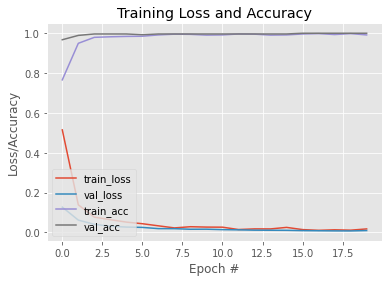

In [76]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('plot')